<a href="https://colab.research.google.com/github/DevinMillan/WineQuality/blob/main/WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving winequality-white.csv to winequality-white.csv
Predicted Quality at Average Alcohol Content: 5.6360225140712945


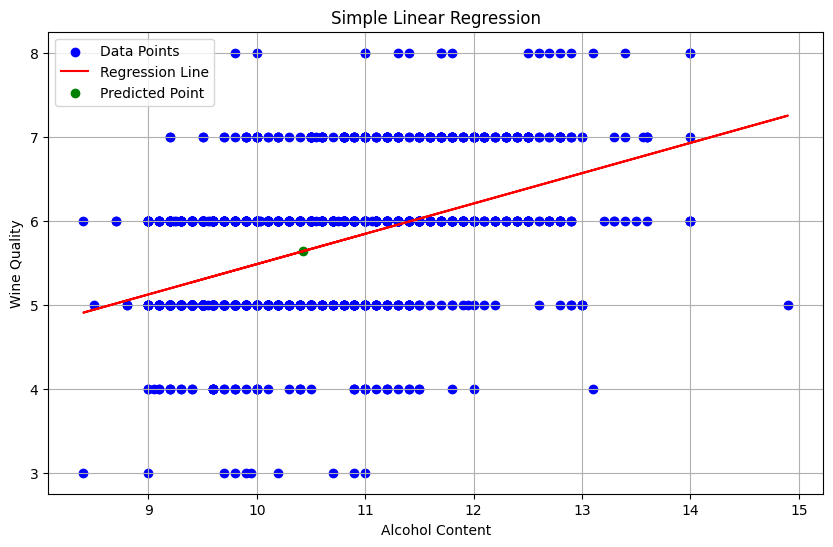

Correlation with Quality:
fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050554
total sulfur dioxide   -0.185112
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

X = df[['alcohol']]
y = df['quality']

# Train Model
model = LinearRegression()
model.fit(X, y)

# Calculate avg alcohol content
avg_alcohol = df['alcohol'].mean()

# Predict
avg_alcohol_df = pd.DataFrame([[avg_alcohol]], columns=['alcohol'])
y_pred_avg = model.predict(avg_alcohol_df)  # Predict quality for a wine with avg alcohol content

print("Predicted Quality at Average Alcohol Content:", y_pred_avg[0])

# Create scatterplot with regression line
plt.figure(figsize=(10,6))
plt.scatter(X, y, label='Data Points', color='blue')  # Plot data points
plt.plot(X, model.predict(X), color='red', label='Regression Line')  # Plot regression line
plt.scatter(avg_alcohol_df, y_pred_avg, color='green', label='Predicted Point')  # Plot predicted point
plt.xlabel('Alcohol Content')
plt.ylabel('Wine Quality')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

# Correlation with quality
corr = df.corr()['quality']
print("Correlation with Quality:")
print(corr)


Saving winequality-white.csv to winequality-white (1).csv
Multiple Linear Regression Coefficients: [0.36281202 0.12691651 0.09449399]
Intercept: 5.6235
R-squared: 0.3132
Mean Absolute Error: 0.5404
Mean Squared Error: 0.4488


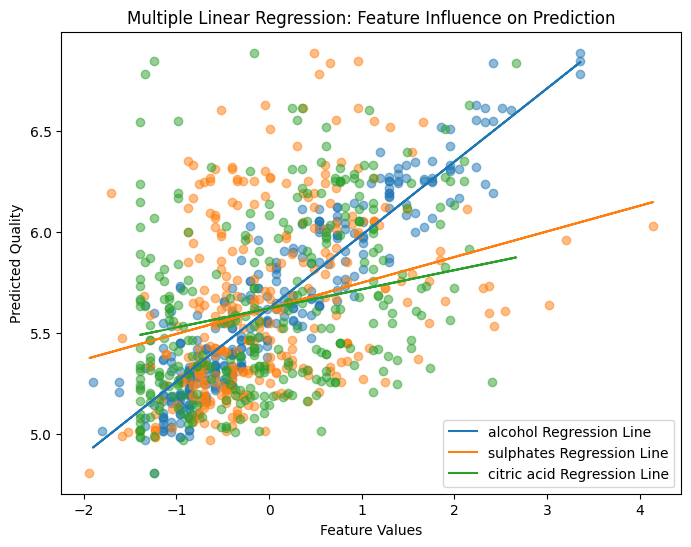

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

selected_features = ['alcohol', 'sulphates', 'citric acid']
X = df[selected_features]
y = df['quality']

# Standardize features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=selected_features)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit Multiple Linear Regression model
multiple_lr = LinearRegression()
multiple_lr.fit(X_train, y_train)

# Predict
y_pred_multiple = multiple_lr.predict(X_test)

# Model Performance Metrics
mse = mean_squared_error(y_test, y_pred_multiple)
mae = mean_absolute_error(y_test, y_pred_multiple)
r2 = r2_score(y_test, y_pred_multiple)

print(f"Multiple Linear Regression Coefficients: {multiple_lr.coef_}")
print(f"Intercept: {multiple_lr.intercept_:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Visualization: Multiple Regression Lines
plt.figure(figsize=(8, 6))
for feature in selected_features:
    plt.plot(X_test[feature], multiple_lr.coef_[selected_features.index(feature)] * X_test[feature] + multiple_lr.intercept_, label=f'{feature} Regression Line')
    plt.scatter(X_test[feature], y_pred_multiple, alpha=0.5)

plt.xlabel("Feature Values")
plt.ylabel("Predicted Quality")
plt.title("Multiple Linear Regression: Feature Influence on Prediction")
plt.legend()
plt.show()
